In [1]:
import sys
print("Versão do python utilizada será:",sys.version)

Versão do python utilizada será: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

In [5]:
df = pd.read_csv('Spotify Most Streamed Songs.csv')

In [6]:
df.head(11)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,https://i.scdn.co/image/ab67616d0000b273e3a09a...
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,https://i.scdn.co/image/ab67616d0000b2732071a0...
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,https://i.scdn.co/image/ab67616d0000b273017d5e...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Not Found


In [8]:
display(df.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [10]:
print("\nInformações gerais:")
df.info()


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                

In [11]:
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [14]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [19]:
correlation_matrix = df[numerical_columns].corr()

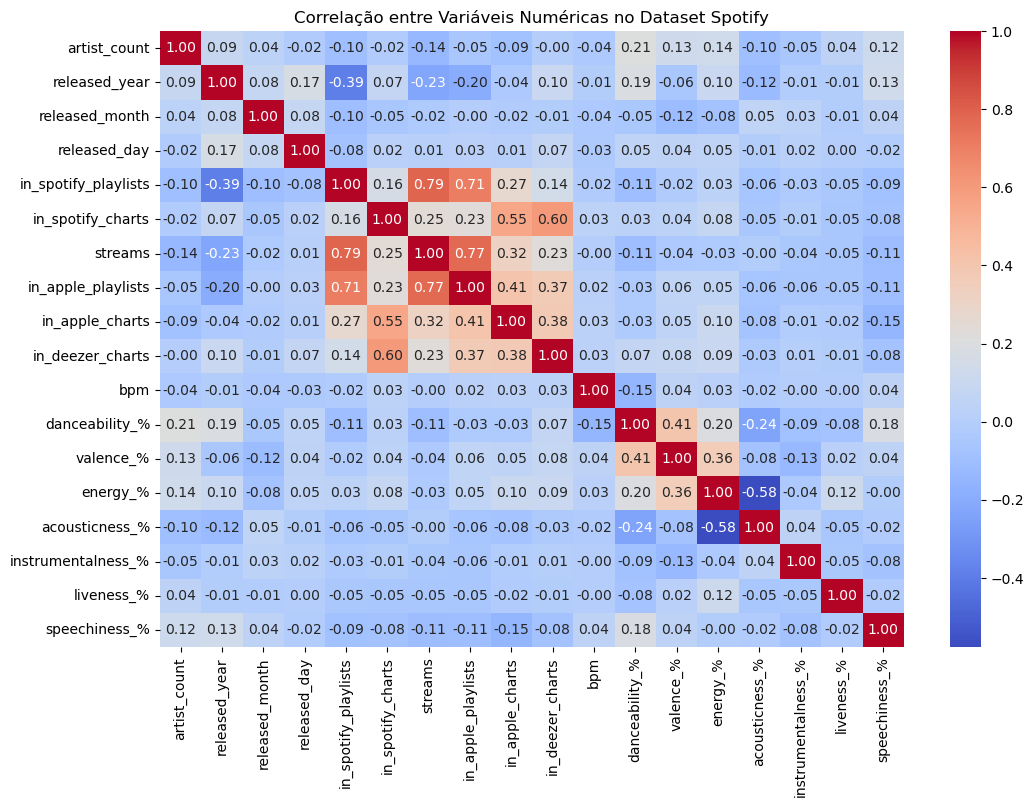

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas no Dataset Spotify')
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

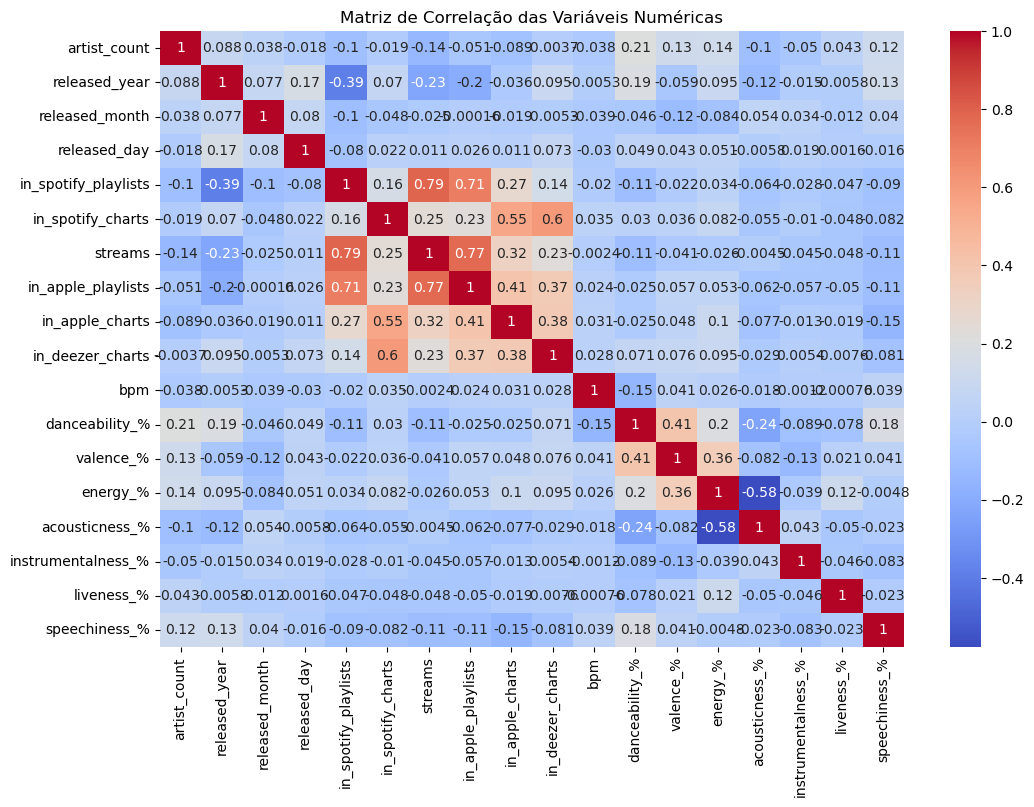

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [23]:
correlation_with_streams = correlation_matrix['streams'].sort_values(ascending=False)
print(correlation_with_streams)

streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: streams, dtype: float64


In [24]:
features = ['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts']
X = df[features]
y = df['streams']

In [25]:
df_clean = pd.concat([X, y], axis=1).dropna()

In [26]:
X_final = df_clean[features]
y_final = df_clean['streams']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [28]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
train_score = rf_reg.score(X_train, y_train)
test_score = rf_reg.score(X_test, y_test)

In [30]:
print(f'Score de treino (R²): {train_score}')
print(f'Score de teste (R²): {test_score}')

Score de treino (R²): 0.9715556424650034
Score de teste (R²): 0.6634376246485152


In [32]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

In [36]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [37]:
print(f'MSE de treino: {train_mse}')
print(f'MSE de teste: {test_mse}')
print(f'R² de treino: {train_r2}')
print(f'R² de teste: {test_r2}')

MSE de treino: 450320885133271.44
MSE de teste: 9.052754812149429e+16
R² de treino: 0.9986737846282359
R² de teste: 0.6301870579935818


In [39]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [40]:
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', seed=42),
                               param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2)

In [41]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [42]:
best_xgb = grid_search_xgb.best_estimator_

In [43]:
y_train_best_pred = best_xgb.predict(X_train)
y_test_best_pred = best_xgb.predict(X_test)

In [44]:
train_mse_best = mean_squared_error(y_train, y_train_best_pred)
test_mse_best = mean_squared_error(y_test, y_test_best_pred)
train_r2_best = r2_score(y_train, y_train_best_pred)
test_r2_best = r2_score(y_test, y_test_best_pred)


In [45]:
print(f'MSE de treino (após otimização): {train_mse_best}')
print(f'MSE de teste (após otimização): {test_mse_best}')
print(f'R² de treino (após otimização): {train_r2_best}')
print(f'R² de teste (após otimização): {test_r2_best}')

MSE de treino (após otimização): 4.922584108604565e+16
MSE de teste (após otimização): 6.363272291307561e+16
R² de treino (após otimização): 0.8550276718411325
R² de teste (após otimização): 0.7400547683365748


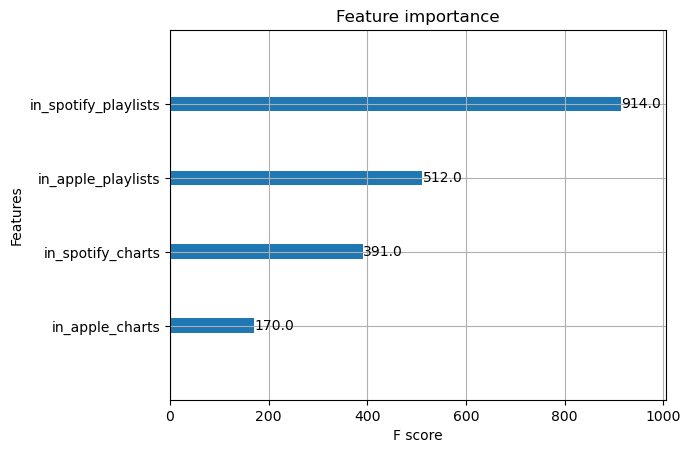

In [46]:
xgb.plot_importance(best_xgb)
plt.show()

In [48]:
joblib.dump(best_xgb, 'modelo_xgboost_Spotify.pkl')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
